## Camera_text
The algorithm was developed to read th text on the object using camera. There is an opportunity to use different image filters to improoving result. All filters are writed into methods, so for changing the image you can just call it.


#### Import

In [1]:
import os, glob, time
import numpy as np

import cv2
# from cv2 import aruco
from io import BytesIO
import pytesseract
from Levenshtein import distance
import PIL.Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import IPython.display
import imutils
# from cam_module import cam
import json, codecs

#### Open Pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\user\Tesseract-OCR\tesseract.exe'

#### Methods for using different image filters on frames

In [3]:
t0 = time.time()
def array_to_image(a, fmt='jpeg'):
    f = BytesIO()    
    PIL.Image.fromarray(a).save(f, fmt)    
    return IPython.display.Image(data=f.getvalue())
def Changing(photo):
    thresh = 205
    img_blur = cv2.GaussianBlur(photo, (5, 5), 0)
    image_BlN = cv2.medianBlur(img_blur, 7)
    #img_res = cv2.threshold(image_BlN, thresh, 255, cv2.THRESH_BINARY)
    return image_BlN
def kontrast (photo):
    return cv2.threshold(photo,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
def kontrast_usual (photo):
    thresh = 25
    return cv2.threshold(photo, thresh, 200, cv2.THRESH_BINARY)[1]
def blur(photo):
    return cv2.GaussianBlur(photo, (5, 5), 0)

#### Script for text detection with the opportunity for using different filters on frames

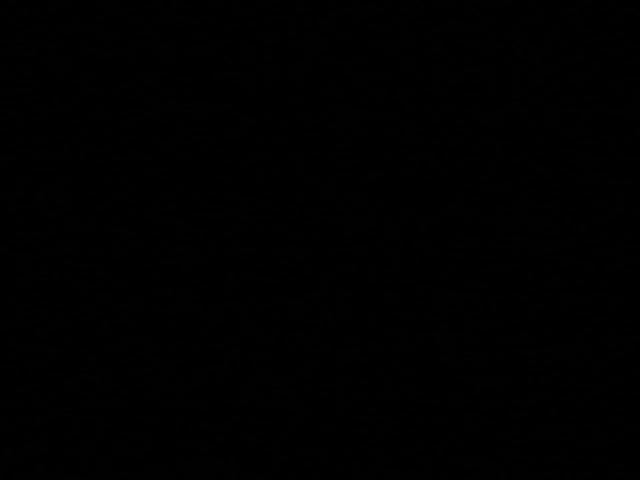

''

In [ ]:

# Load camera calibration parameters

IMAGE_SHAPE = (720, 1280, 3) #
# IMAGE_SHAPE = (1080, 1920, 3)
# video capture object
cam_idx = 0
cams = {
    cam_idx:cv2.VideoCapture(cam_idx)
}
# jupyter displays
d0 = IPython.display.display(None, display_id=3)
d1 = IPython.display.display(None, display_id=4)

fps = 5.0
frame_idx = 0
motion = False
motion_prev = False
post_motion_rec = False
motion_timeout = 5.0
record_timeout = 2.0
frameDelta = np.zeros(IMAGE_SHAPE[:2])
while True: 
    try:        
        
        if time.time() - t0 > 1/fps:
            t0 = time.time()   

            ret, frame = cams[cam_idx].read()
            if frame is None:
                continue
                
            # ------ CODE

            ground = 'Tesseract Sample'
            #img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            #img = frame
            #img = cv2.bilateralFilter(5,25,25)
            img = blur(img)
            #img = cv2.GaussianBlur(img, (5, 5), 0)
            #img = Changing(img)
            #img = kontrast_usual (img)
            #img = kontrast(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1]
            
#             d = pytesseract.image_to_data(img, lang='rus', output_type=pytesseract.Output.DICT)
            text = pytesseract.image_to_string(img, lang = 'rus')
            
#             n_boxes = len(d['level'])
#             text = ''
#             for i in range(n_boxes):
#                 (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
#                 cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
#             text+= ' '.join(d['text'])+' '
#             print(text)
            # ------ CODE
            d0.update(array_to_image(frame))    
            d1.update( text )  
            frame_idx = (frame_idx+1) % 1024
    except KeyboardInterrupt:
        break
    except Exception as e:
        raise e
cams[cam_idx].release()